# Background


This notebook is to make a baseline for slot1, aspect category detection. We use glove to generate sentence vector. 

Because we want to augment the embedding wegiht of target word to evaluate whether or not the attention is useful. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pathlib import Path
import anago
from anago.utils import load_data_and_labels, load_glove

Using TensorFlow backend.


In [2]:
ls ../datasets/

raw-semeval-2016/ restaurant2.zip   semeval-2016/
restaurant/       restaurant_small/


In [3]:
train_path = Path.cwd().parent.joinpath('datasets/semeval-2016/train.csv')
test_path = Path.cwd().parent.joinpath('datasets/semeval-2016/test.csv')

In [4]:
# Read data
data_train = pd.read_csv(train_path)
data_test = pd.read_csv(test_path)

In [5]:
def df2data(df):
    """Read data and labels from dataframe
    Input:
        df: three columns, ['Sentence #', 'Tag', 'Word']
    Output:
        data: datasize * ['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.']
        label: datasize * ['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O']
    """
    agg_func = lambda s: [(w, t) for w, t in zip(s["Word"].values.tolist(),
                                                 s["Tag"].values.tolist())]
    grouped = df.groupby("Sentence #").apply(agg_func)
    data = [[w[0] for w in s] for s in grouped]
    label = [[w[1] for w in s] for s in grouped]  
    
    return data, label

In [15]:
!ls ../datasets/semeval-2016/slot1/train_target.npy

test_att_sentence.npy  test_target.npy        train_label_df.csv
test_att_weights       train_att_sentence.npy train_target.npy
test_label_df.csv      train_att_weights


In [21]:
# load target words from npy
train_target_path = '../datasets/semeval-2016/slot1/train_target.npy'
test_target_path = '../datasets/semeval-2016/slot1/test_target.npy'

train_target = list(np.load(train_target_path))
test_target = list(np.load(test_target_path))

In [25]:
train_target[:30]

[['place'],
 ['staff'],
 ['NULL'],
 ['food', 'portions'],
 ['NULL'],
 ['place'],
 ['food'],
 ['Saul'],
 ['foie gras terrine with figs', 'duck confit'],
 ['wine list'],
 ['NULL'],
 ['restaurant'],
 ['cart attendant'],
 ['NULL'],
 ['Food'],
 ['Chow fun', 'pork shu mai', 'NULL'],
 ['place'],
 ['Fish'],
 ['Service', 'oysters', 'NULL'],
 ['NULL'],
 ['Restaurant Saul'],
 ['NULL', 'service', 'decor'],
 ['duck breast special'],
 ['NULL'],
 [],
 ['NULL'],
 ['food', 'Thai fusion stuff', 'NULL'],
 ['Grilled Chicken special with Edamame Puree'],
 ['Edamame pureed'],
 []]

In [26]:
x_train_words, _ = df2data(data_train)
x_test_words, _ = df2data(data_test)

### embedding

In [8]:
EMBEDDING_PATH = '../embedding_weights/glove.840B.300d.txt'

In [9]:
embeddings = load_glove(EMBEDDING_PATH)

below are some test code

In [42]:
train_target[:30]

[['place'],
 ['staff'],
 ['NULL'],
 ['food', 'portions'],
 ['NULL'],
 ['place'],
 ['food'],
 ['Saul'],
 ['foie gras terrine with figs', 'duck confit'],
 ['wine list'],
 ['NULL'],
 ['restaurant'],
 ['cart attendant'],
 ['NULL'],
 ['Food'],
 ['Chow fun', 'pork shu mai', 'NULL'],
 ['place'],
 ['Fish'],
 ['Service', 'oysters', 'NULL'],
 ['NULL'],
 ['Restaurant Saul'],
 ['NULL', 'service', 'decor'],
 ['duck breast special'],
 ['NULL'],
 [],
 ['NULL'],
 ['food', 'Thai fusion stuff', 'NULL'],
 ['Grilled Chicken special with Edamame Puree'],
 ['Edamame pureed'],
 []]

In [79]:
targets_string = [' '.join(x) for x in targets]

In [80]:
targets_string

['NULL',
 'food Thai fusion stuff NULL',
 'Grilled Chicken special with Edamame Puree',
 'Edamame pureed',
 '']

In [84]:
[len(x) for x in targets_string]

[4, 27, 42, 14, 0]

In [83]:
'fusion' in targets_string[1]

True

In [66]:
targets = train_target[25:30]
targets

[['NULL'],
 ['food', 'Thai fusion stuff', 'NULL'],
 ['Grilled Chicken special with Edamame Puree'],
 ['Edamame pureed'],
 []]

In [68]:
test = ['fusion', 'stuff', 'xxxx']
for word in test:
    if word in targets[1]:
        print(1)

In [86]:
for sent_target in targets_string:
    print(sent_target)
    if len(sent_target) == 0 or (len(sent_target)==4 and sent_target=='NULL'): # No target or target is NULL
        print(1)
    else:
        pass

NULL
1
food Thai fusion stuff NULL
Grilled Chicken special with Edamame Puree
Edamame pureed

1


In [90]:
for (sent, sent_target) in zip(x_train_words[25:30], targets_string): # each sentence 
    print(sent)
    print(sent_target)
    print()

['and', 'i', 'hate', 'to', 'say', 'this', 'but', 'i', 'doubt', "i'll", 'ever', 'go', 'back', '.']
NULL

['the', 'food', 'is', 'very', 'average', '.', '.', '.', 'the', 'thai', 'fusion', 'stuff', 'is', 'a', 'bit', 'too', 'sweet', ',', 'every', 'thing', 'they', 'serve', 'is', 'too', 'sweet', 'here', '.']
food Thai fusion stuff NULL

['the', 'only', 'thing', 'i', 'moderately', 'enjoyed', 'was', 'their', 'grilled', 'chicken', 'special', 'with', 'edamame', 'puree', '.']
Grilled Chicken special with Edamame Puree

['i', 'had', 'never', 'had', 'edamame', 'pureed', 'before', 'but', 'i', 'thought', 'it', 'was', 'innovative', 'and', 'tasty', '(', "could've", 'used', 'a', 'bit', 'more', 'salt', ')', '.']
Edamame pureed

['anyways', ',', 'if', "you're", 'in', 'the', 'neighborhood', 'to', 'eat', 'good', 'food', ',', 'i', "wouldn't", 'waste', 'my', 'time', 'trying', 'to', 'find', 'something', ',', 'rather', 'go', 'across', 'the', 'street', 'to', 'tamari', '.']




Sum all to `word2vector_wegihted` function, augment the weight if the word is target word

In [111]:
def word2vector_wegihted(x_words, targets, times):
    sentence_vectors = []
    targets_string = [' '.join(x) for x in targets]
    for (sent, sent_target) in zip(x_words, targets_string): # each sentence 
        one_sentence = [0]*300
        # If sentence has no target or target is NULL, add word embedding normally 
        if len(sent_target) == 0 or (len(sent_target)==4 and sent_target=='NULL'): # No target or target is NULL
            for word in sent:
                if not embeddings.get(word) is None:
                    one_sentence += embeddings[word]
            sentence_vectors.append(one_sentence)
        # If sentence has multiple target words, augment the target weights
        else:
            for word in sent:
                if not embeddings.get(word) is None and word in sent_target: # if word exist and is the target word
                    one_sentence += times * embeddings[word] # augment 
                elif not embeddings.get(word) is None: # if word exist and is not the target word
                    one_sentence += embeddings[word]
                else: # if the word not exist 
                    pass 
            sentence_vectors.append(one_sentence) 
    
    return np.array(sentence_vectors)


def word2vector(x_words):  # convert words to sentence embedding 
    sentence_vectors = []
    for sent in x_words:
        one_sentence = [0]*300
        for word in sent:
            if not embeddings.get(word) is None:
                one_sentence += embeddings[word]
        sentence_vectors.append(one_sentence)
    return np.array(sentence_vectors)

In [31]:
x_train = word2vector(x_train_words)
x_test = word2vector(x_test_words)

In [34]:
print(len(x_train))
print(len(x_test))
# print(type(x_train))
print(x_train[0][:10])

2000
676
[-1.2522427e+00  2.9516120e+00 -3.3916620e+00  5.9891500e-01
  2.7914800e-02 -4.4706000e-02 -8.0774300e-02 -2.5486480e+00
 -3.5198700e-02  3.9527000e+01]


In [112]:
x_train_15 = word2vector_wegihted(x_train_words, train_target, 1.5)
x_test_15 = word2vector_wegihted(x_test_words, test_target, 1.5)

In [113]:
x_train_20 = word2vector_wegihted(x_train_words, train_target, 2)
x_test_20 = word2vector_wegihted(x_test_words, test_target, 2)

In [175]:
x_train_30 = word2vector_wegihted(x_train_words, train_target, 2)
x_test_30 = word2vector_wegihted(x_test_words, test_target, 2)

In [116]:
print(x_train_15.shape)
print(x_test_15.shape)
print(x_train_20.shape)
print(x_test_20.shape)

(2000, 300)
(676, 300)
(2000, 300)
(676, 300)


1.5 means multiply the weights of word if the word is a target word. We use this to as the attention compeletely extracted

### label 

this is a multicalss classification

In [103]:
train_path = Path.cwd().parent.joinpath('datasets/semeval-2016/slot1/train_label_df.csv')
test_path = Path.cwd().parent.joinpath('datasets/semeval-2016/slot1/test_label_df.csv')

In [104]:
y_train_df = pd.read_csv(train_path)
y_test_df = pd.read_csv(test_path)

In [105]:
y_train_df.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [106]:
y_train = y_train_df.values
y_test = y_test_df.values

# model construct

In [107]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

ovr = OneVsRestClassifier(LogisticRegression())

(2000, 300)
(2000, 12)
[learning_curve] Training set sizes: [ 160  520  880 1240 1600]
[CV]  ................................................................
[CV] .................................... , score=0.205, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ...................................... , score=0.2, total=   1.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV] ................................... , score=0.1925, total=   3.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.7s remaining:    0.0s


[CV] .................................... , score=0.185, total=   4.5s
[CV]  ................................................................
[CV] ................................... , score=0.1525, total=   6.1s
[CV]  ................................................................
[CV] ..................................... , score=0.11, total=   0.2s
[CV]  ................................................................
[CV] ................................... , score=0.1775, total=   1.3s
[CV]  ................................................................
[CV] .................................... , score=0.185, total=   2.9s
[CV]  ................................................................
[CV] ................................... , score=0.1975, total=   4.4s
[CV]  ................................................................
[CV] ..................................... , score=0.18, total=   6.0s
[CV]  ................................................................


/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1 is present in all training examples.
  str(classes[c]))


[CV] .................................... , score=0.135, total=   0.2s
[CV]  ................................................................
[CV] ..................................... , score=0.18, total=   1.3s
[CV]  ................................................................
[CV] ..................................... , score=0.19, total=   2.8s
[CV]  ................................................................
[CV] ..................................... , score=0.19, total=   4.6s
[CV]  ................................................................
[CV] ................................... , score=0.1975, total=   6.1s
[CV]  ................................................................
[CV] ................................... , score=0.1575, total=   0.2s
[CV]  ................................................................
[CV] ................................... , score=0.2075, total=   1.3s
[CV]  ................................................................
[CV] .

/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 7 is present in all training examples.
  str(classes[c]))


[CV] ................................... , score=0.1525, total=   0.2s
[CV]  ................................................................
[CV] ..................................... , score=0.21, total=   1.3s
[CV]  ................................................................
[CV] .................................... , score=0.185, total=   2.6s
[CV]  ................................................................
[CV] ..................................... , score=0.18, total=   4.6s
[CV]  ................................................................
[CV] .................................... , score=0.175, total=   6.0s


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.2min finished


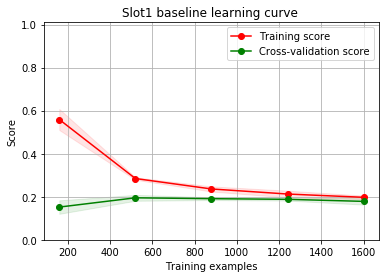

In [176]:
# first to see the cv result 
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression


%matplotlib inline

# learning curve function
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

def plot_learning_curve(
        estimator, title, X, y, ylim=None, cv=None,
        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), verbose=0):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
ovr = OneVsRestClassifier(LogisticRegression())

X = x_train_30
train_labels = y_train
print(X.shape)
print(train_labels.shape)
plot_learning_curve(ovr, "Slot1 baseline learning curve ",
                    X, train_labels, ylim=(0.0, 1.01), cv=cv, n_jobs=1, verbose=4)

plt.show()

In [177]:
from sklearn.utils import shuffle
from sklearn.metrics import f1_score

def loop_predict(model, x_train, x_test, y_train, y_test, loop=5):
    f1 = []
    for i in range(loop):
        x_train, x_test = shuffle(x_train, x_test)
        model.fit(x_train, x_test)
        y_pred = model.predict(y_train)
        micro_f1 = f1_score(y_test, y_pred, average='micro')
        f1.append(micro_f1)
    print("F1 is {} (+/-{})".format(np.mean(f1), np.std(f1)))
    return model

In [178]:
train_x = x_train_30
train_labels = y_train
test_x = x_test_30
test_labels = y_test

In [179]:
ovr = OneVsRestClassifier(LogisticRegression())

model1 = loop_predict(ovr, train_x, train_labels, test_x, test_labels)

F1 is 0.1693019636653355 (+/-0.002027090902149949)


- glove with 1.5 times word weighted: 0.5837
- glove with 2 times word weighted: 0.5854
- glove with 3 times word weighted: 0.169

# Test the similarity as the feature (not finished)

We caculate the distance between each target word and each word in sentence. Because this will cause each sentence demision have different size, so we padding the all sentence length as a fixed size

In [126]:
import spacy

In [128]:
x_train_words[0]
# x_test_words

['judging',
 'from',
 'previous',
 'posts',
 'this',
 'used',
 'to',
 'be',
 'a',
 'good',
 'place',
 ',',
 'but',
 'not',
 'any',
 'longer',
 '.']

In [129]:
train_target[0]

['place']

In [ ]:
x_train_words = [' '.join(x) for x in x_train_words]

In [136]:
x_train_words[:2]

['judging from previous posts this used to be a good place , but not any longer .',
 'we , there were four of us , arrived at noon - the place was empty - and the staff acted like we were imposing on them and they were very rude .']

In [131]:
nlp = spacy.load('en')

In [ ]:
for (sentence, sen_target) in zip(x_train_words, train_target):
    tokens = nlp(sentence)
    for 

In [138]:
x_train_tokens = nlp(x_train_words[0])

Briefly, token1.similarity(token2) will generate an error if token2 is a single-character word. 

In [167]:
train_target_string = [' '.join(x) for x in train_target]
test_target_string = [' '.join(x) for x in test_target]

In [ ]:
for (sent, sent_target) in zip(x_words, train_target): # each sentence 
    x_train_string = [' '.join(x) for x in sent]
    # If sentence has no target or target is NULL, add word embedding normally 
    if len(sent_target) == 0 or (len(sent_target)==4 and sent_target=='NULL'): # No target or target is NULL
        continue 
    else:
        x_words_tokens = nlp(x_train_string)
        for target_word in sent_target:
            

In [169]:
for token1 in x_train_tokens:
    if token1.text == 'place':
        for token2 in x_train_tokens:
            if len(token2.text) == 1:
                pass
            else:
                print(token1.similarity(token2))

AttributeError: 'str' object has no attribute 'similarity'

In [ ]:
for token1 in x_train_tokens:
    for 
    if token1.text == 'place':
        for token2 in x_train_tokens:
            if len(token2.text) == 1:
                pass
            else:
                print(token1.similarity(token2))

In [153]:
for token1 in x_train_tokens:
    print(token1.text)

judging
from
previous
posts
this
used
to
be
a
good
place
,
but
not
any
longer
.
